# SVM with Sklearn (Regression)

### Load the data

In [1]:
from sklearn.datasets import fetch_california_housing

boston = fetch_california_housing()
# sample 2000 data points to speed up the computation
X = boston.data[:2000]
y = boston.target[:2000]

### Split the data into training and test sets

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((1600, 8), (400, 8))

### SVM

In [3]:
from sklearn.svm import SVR

model = SVR(C=2.0, kernel="linear", epsilon=0.1)
model.fit(x_train, y_train)

SVR(C=2.0, kernel='linear')

### Make predictions on the test set

In [4]:
y_pred = model.predict(x_test)
y_pred

array([1.96635193, 2.7804798 , 2.75874682, 5.23131831, 2.46106522,
       1.1409076 , 1.49545775, 3.03014586, 1.1494356 , 2.18686903,
       3.18383777, 0.89862059, 1.50491787, 2.18239377, 2.35243859,
       1.41798014, 2.94310486, 3.23164399, 1.23916738, 2.31424775,
       4.71120189, 2.20398853, 1.6375495 , 1.74384211, 1.24059613,
       2.14634895, 2.33767345, 1.17140479, 1.8625632 , 3.80940765,
       2.34398502, 5.13715453, 3.16512567, 1.78720555, 0.99608274,
       1.90121041, 2.64996819, 1.64208313, 2.16215649, 4.09637886,
       1.81440028, 2.88821772, 2.46869862, 2.68807887, 1.72382015,
       2.37114962, 3.00832718, 0.88599005, 2.80371233, 2.85109978,
       1.23832689, 2.46821206, 1.1198108 , 1.11982183, 1.97026272,
       1.96338034, 2.40295322, 2.0027568 , 3.27159558, 1.46486537,
       3.95310926, 2.27923353, 1.78039941, 2.6998302 , 1.8645743 ,
       2.81652107, 2.44997873, 2.26463588, 2.89018663, 3.43124278,
       1.96270603, 2.29443309, 2.24644323, 2.1790719 , 5.85260

### Evaluate the model

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.44196160642207166, 0.4985649666723313)

## Support Vector Regression (SVR) using linear and non-linear kernels

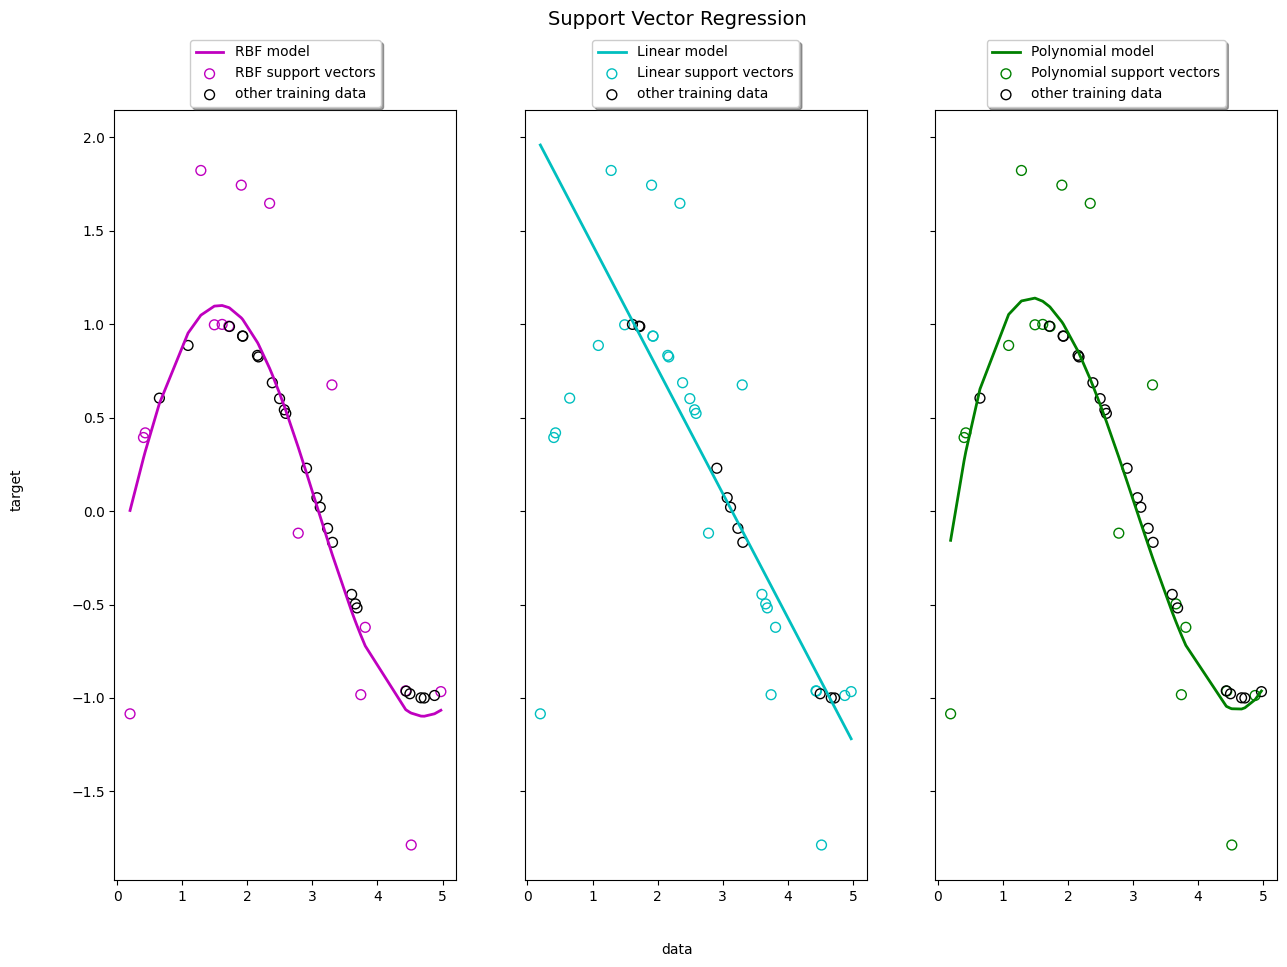

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR


# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))


# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)


# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()